Python_Web Scraping
<br>
Created by @Anna-Portfolio


PART #1: WEB SCRAPING AND CREATING A DATAFRAME
<br>
PART #2: DATA PREPARATION
<br>
PART #3: DATA VISUALIZATION

PART #1: WEB SCRAPING AND CREATING A DATAFRAME




In [5]:
from bs4 import BeautifulSoup
import requests

Get the structure from the url

In [6]:
url = "https://en.wikipedia.org/wiki/Nasdaq-100"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')


In [7]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Nasdaq-100 - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

Get the table for analysis (this is table #2 in this website, entitled "List of 1000-point milestones by number of trading days")

In [8]:
table = soup.find_all('table')[2]
print(table)

<table class="wikitable">
<tbody><tr>
<th>Milestone<sup class="reference" id="cite_ref-nasdaqmilestones_10-0"><a href="#cite_note-nasdaqmilestones-10"><span class="cite-bracket">[</span>10<span class="cite-bracket">]</span></a></sup><br/><small>(closing)</small>
</th>
<th>Date of Record (closing)<sup class="reference" id="cite_ref-nasdaqmilestones_10-1"><a href="#cite_note-nasdaqmilestones-10"><span class="cite-bracket">[</span>10<span class="cite-bracket">]</span></a></sup>
</th>
<th>Trading Days<sup class="reference" id="cite_ref-nasdaqmilestones_10-2"><a href="#cite_note-nasdaqmilestones-10"><span class="cite-bracket">[</span>10<span class="cite-bracket">]</span></a></sup>
</th></tr>
<tr>
<td>1,000</td>
<td>July 8, 1997</td>
<td>3,143
</td></tr>
<tr>
<td>2,000</td>
<td>January 11, 1999</td>
<td>381
</td></tr>
<tr>
<td>3,000</td>
<td>November 18, 1999</td>
<td>217
</td></tr>
<tr>
<td>4,000</td>
<td>February 8, 2000</td>
<td>55
</td></tr>
<tr>
<td>5,000</td>
<td>January 6, 2017</td>
<

Identify the column headers (using the 'th' tag)

In [9]:
column_headers = table.find_all('th')
print(column_headers)

[<th>Milestone<sup class="reference" id="cite_ref-nasdaqmilestones_10-0"><a href="#cite_note-nasdaqmilestones-10"><span class="cite-bracket">[</span>10<span class="cite-bracket">]</span></a></sup><br/><small>(closing)</small>
</th>, <th>Date of Record (closing)<sup class="reference" id="cite_ref-nasdaqmilestones_10-1"><a href="#cite_note-nasdaqmilestones-10"><span class="cite-bracket">[</span>10<span class="cite-bracket">]</span></a></sup>
</th>, <th>Trading Days<sup class="reference" id="cite_ref-nasdaqmilestones_10-2"><a href="#cite_note-nasdaqmilestones-10"><span class="cite-bracket">[</span>10<span class="cite-bracket">]</span></a></sup>
</th>]


Clean the table headers from unnecessary text and create a list

In [10]:
column_headers_list = [header.text.strip() for header in column_headers]
print(column_headers_list)

['Milestone[10](closing)', 'Date of Record (closing)[10]', 'Trading Days[10]']


Cleanup: Remove remaining unnecessary characters (here, the index reference '[10]')

In [11]:
column_headers_list = [x.replace('[10]', '') for x in column_headers_list]

print(column_headers_list)

['Milestone(closing)', 'Date of Record (closing)', 'Trading Days']


Create df which shows the column headers



In [12]:
import pandas as pd
df = pd.DataFrame(columns = column_headers_list)

df

,Milestone(closing),Date of Record (closing),Trading Days


Get column data from the table (by using the 'tr' and 'td' tags)




In [13]:
column_data = table.find_all('tr')
# for loop for getting the data (escaping the first element which is an empty list of [])
for row in column_data[1:]:
  row_data = row.find_all('td')
  separate_row_data = [data.text.strip() for data in row_data]
  #pull every separate row data into the dataframe
  length = len(df)
  df.loc[length] = separate_row_data


Final result

In [14]:
print(df)

   Milestone(closing) Date of Record (closing) Trading Days
0               1,000             July 8, 1997        3,143
1               2,000         January 11, 1999          381
2               3,000        November 18, 1999          217
3               4,000         February 8, 2000           55
4               5,000          January 6, 2017        4,255
5               6,000       September 13, 2017          172
6               7,000         January 26, 2018           93
7               8,000            July 24, 2019          374
8               9,000         January 13, 2020          119
9              10,000            June 10, 2020          103
10             11,000           August 3, 2020           37
11             12,000          August 31, 2020           20
12             13,000          January 8, 2021           90
13             14,000           April 15, 2021           66
14             15,000            July 23, 2021           69
15             16,000         November 3

PART #2: DATA PREPARATION

show all names of columns with their data types

In [15]:
df.dtypes

,0
Milestone(closing),object
Date of Record (closing),object
Trading Days,object


change data type from object to integer for columns Milestone(closing) and Trading Days

In [16]:
df['Milestone(closing)'] = [y.replace(',', '') for y in df['Milestone(closing)']]
df['Milestone(closing)'] = df['Milestone(closing)'].astype(str).astype(int)

In [17]:
df['Trading Days'] = [z.replace(',', '') for z in df['Trading Days']]
df['Trading Days'] = df['Trading Days'].astype(str).astype(int)

In [18]:
df.dtypes

,0
Milestone(closing),int64
Date of Record (closing),object
Trading Days,int64


identify missing values (find the total of missing values per column)
<br>output: 0, meanining: there are no missing values in dataframe

In [19]:
df.isna().sum()

,0
Milestone(closing),0
Date of Record (closing),0
Trading Days,0


duplicates check (ignoring the 1st row)
<br>
output: False, meanining: there are no duplicates in dataframe

In [20]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


PART #3: DATA VISUALIZATION

bar chart

In [21]:
import matplotlib.pyplot as plt

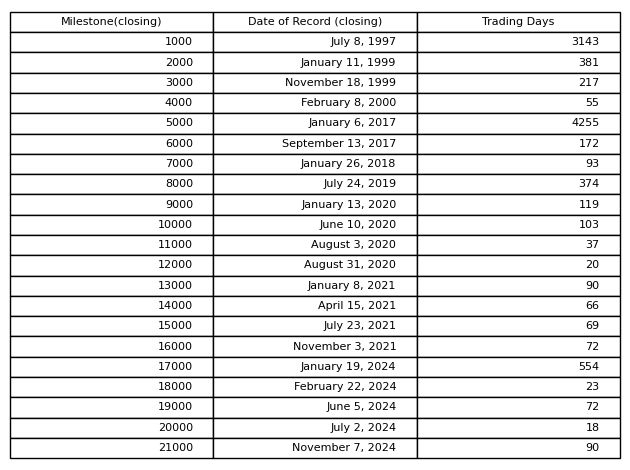

In [22]:
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.show()